# Analysis on the google playstore data set

### Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline
from plotly.offline import iplot
import plotly.figure_factory as ff

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.simplefilter("ignore")


## Importing the dataset

In [2]:
#importing the dataset
df = pd.read_csv("google.csv")
print(len(df))
df = df.drop(df.index[9148])
df.drop_duplicates(subset='App', inplace=True)
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

print(len(df))
#df.drop_duplicates(subset='App',inplace=True)

10841
9658


In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [19]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

## DATA CLEANING

In [97]:
df.drop(columns=['Last Updated', 'Current Ver', 'Android Ver'],inplace = True)
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


SIZE 


In [98]:
df['Size'] = df['Size'].replace('1,000+',1000)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

#print(len(df))

In [99]:
print(len(df))

9658


In [100]:
df.Size.value_counts()

NaN      1226
11        182
12        181
13        177
14        177
         ... 
0.636       1
0.19        1
0.953       1
0.05        1
0.556       1
Name: Size, Length: 461, dtype: int64

In [101]:
df['Size'] = df['Size'].astype(float)

In [102]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

===========================================================================

INSTALLS

In [103]:
df.Installs.value_counts()

1,000,000+        1417
100,000+          1112
10,000+           1031
10,000,000+        937
1,000+             888
100+               710
5,000,000+         607
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

In [104]:
df.Installs=df.Installs.apply(lambda x: x.strip('+'))
df.Installs=df.Installs.apply(lambda x: x.replace(',',''))
df.Installs=df.Installs.replace('Free',np.nan)
df.Installs.value_counts()


1000000       1417
100000        1112
10000         1031
10000000       937
1000           888
100            710
5000000        607
500000         505
50000          469
5000           468
10             385
500            328
50             204
50000000       202
100000000      188
5               82
1               67
500000000       24
1000000000      20
0               14
Name: Installs, dtype: int64

In [105]:
df.Installs = df.Installs.astype(float)

==================================================================

REVIEWS

In [106]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [107]:
#df = df.drop(df.index[10472])

In [108]:
df[10471:].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres


In [109]:
df.Reviews=df.Reviews.replace([~df.Reviews.str.isnumeric()],"NaN")

In [110]:
df.Reviews = df.Reviews.astype(int)

In [111]:
df['Reviews']

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 9658, dtype: int32

===========================================================================

RATINGS

In [112]:
print("Range: ", df.Rating.min(),"-",df.Rating.max())

Range:  1.0 - 5.0


In [113]:
df.Rating.dtype

dtype('float64')

In [114]:
print(df.Rating.isna().sum(),"null values out of", len(df.Rating))

1462 null values out of 9658


In [115]:
df.Rating.fillna(method = "ffill")

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9658, dtype: float64

Text(0, 0.5, 'Frequency')

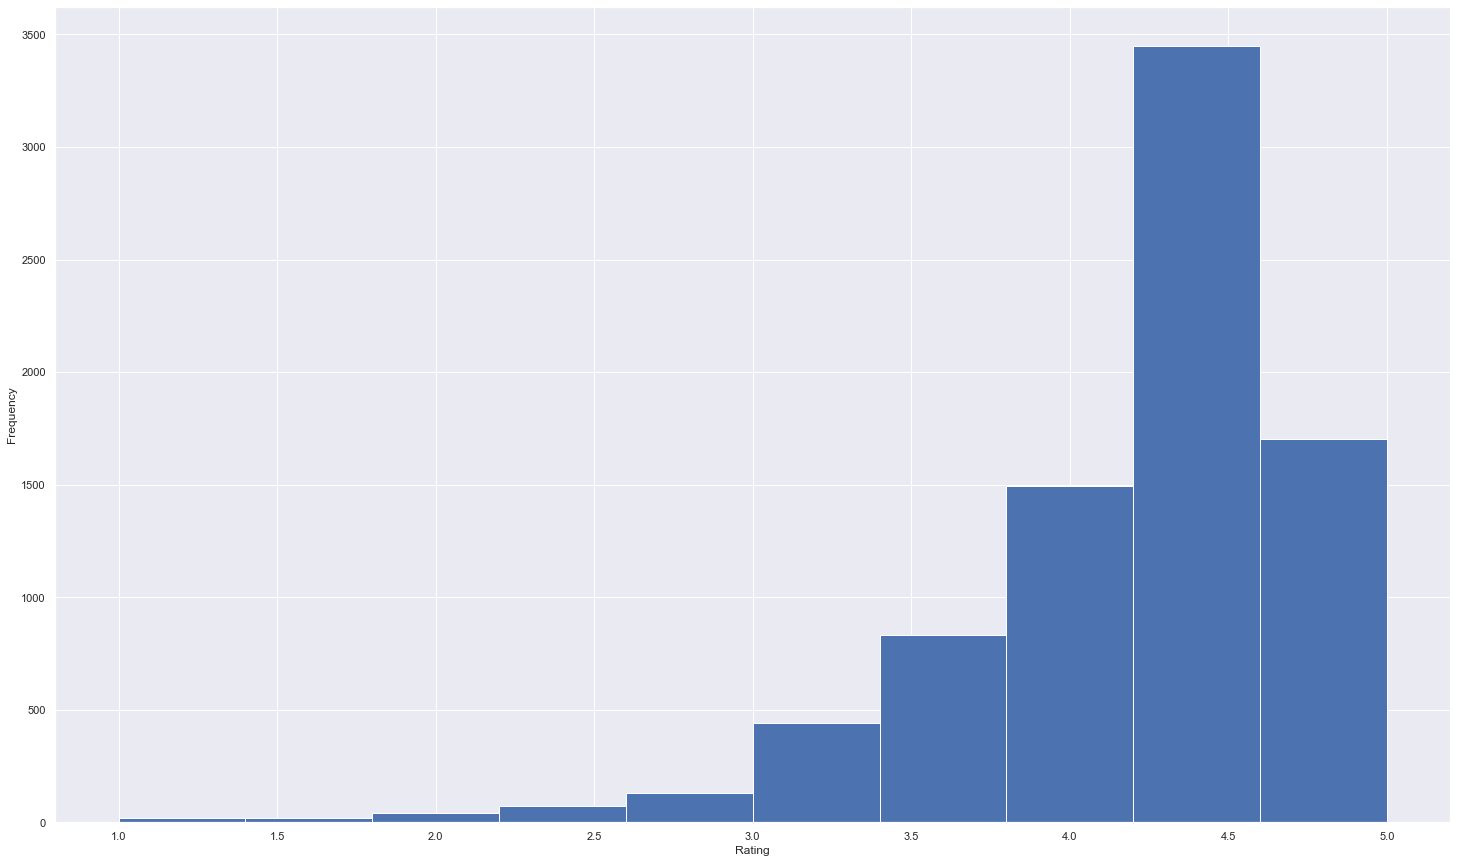

In [116]:
df.Rating.hist();
plt.xlabel('Rating')
plt.ylabel('Frequency')

====================================================================

TYPE

In [117]:
df.Type

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
10836    Free
10837    Free
10838    Free
10839    Free
10840    Free
Name: Type, Length: 9658, dtype: object

In [118]:
df.Type.value_counts()

Free    8902
Paid     756
Name: Type, dtype: int64

============================================================================

PRICE

In [119]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [120]:
df.Price=df.Price.apply(lambda x: x.strip('$'))

In [121]:
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [122]:
df.Price.value_counts()

0        8902
0.99      145
2.99      124
1.99       73
4.99       70
         ... 
3.08        1
15.46       1
3.04        1
1.50        1
1.04        1
Name: Price, Length: 92, dtype: int64

In [123]:
df.Price = df.Price.astype(float)

In [124]:
temp=df.Price.apply(lambda x: True if float(x) >= 200 else False)
df[temp]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
4197,most expensive app (H),FAMILY,4.3,6,1.500,100.0,Paid,399.99,Everyone,Entertainment
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000.0,Paid,399.99,Everyone,Lifestyle
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000.0,Paid,400.00,Everyone,Lifestyle
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000.0,Paid,399.99,Everyone,Lifestyle
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000.0,Paid,399.99,Everyone,Entertainment
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000.0,Paid,299.99,Everyone,Lifestyle
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000.0,Paid,399.99,Everyone,Finance
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000.0,Paid,379.99,Everyone,Lifestyle
5358,I am Rich!,FINANCE,3.8,93,22.000,1000.0,Paid,399.99,Everyone,Finance
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000.0,Paid,399.99,Everyone,Finance


=====================================================================================

CATEGORY

In [125]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

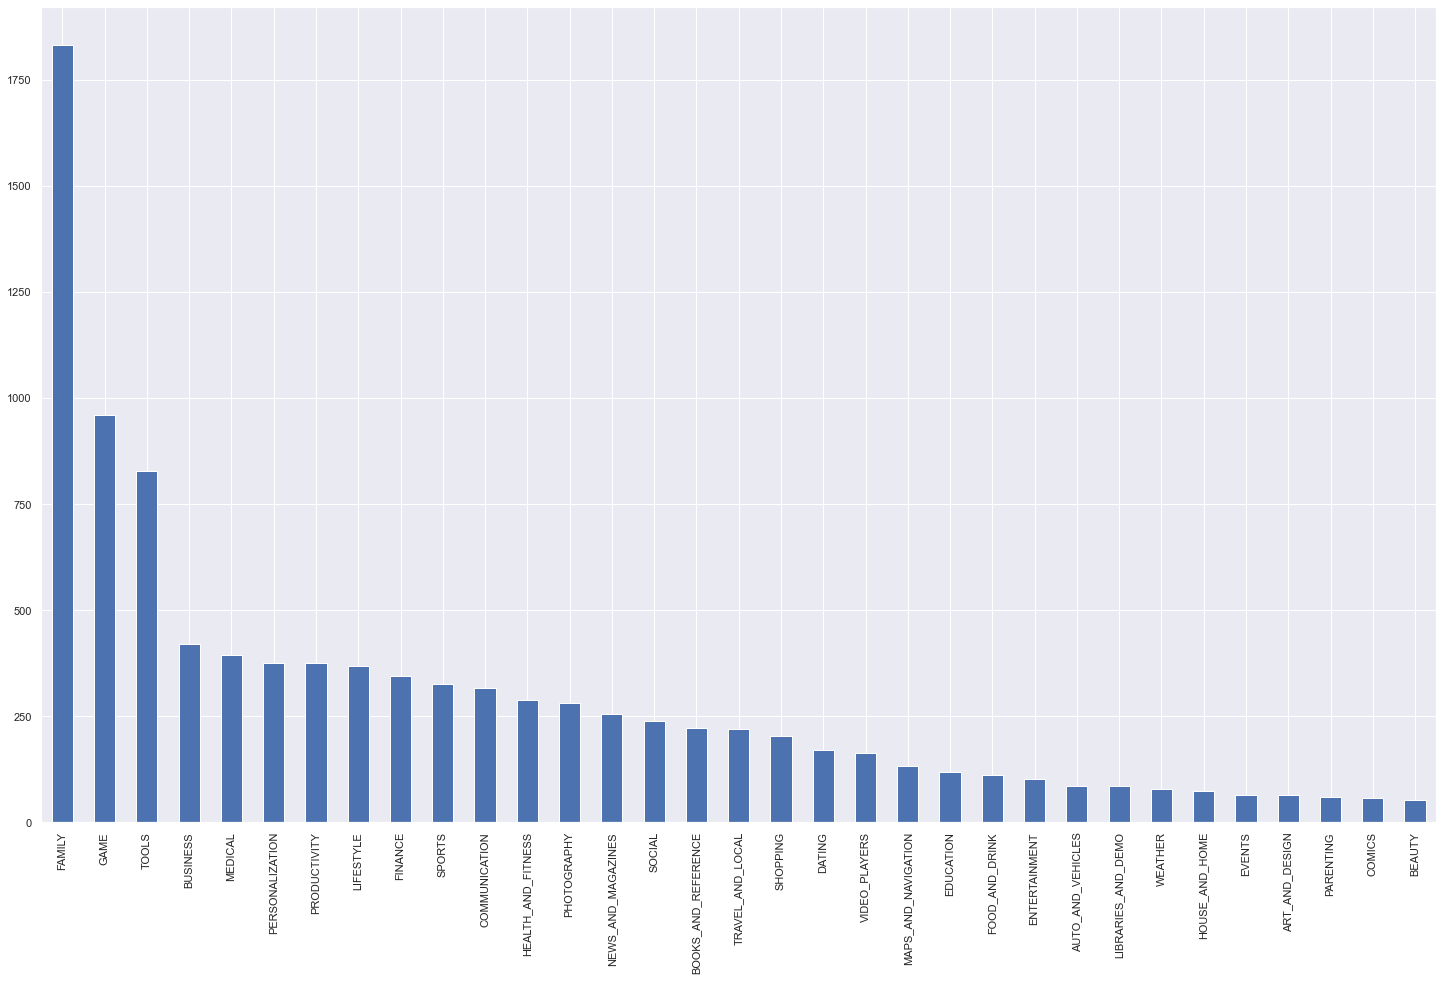

In [126]:
df.Category.value_counts().plot(kind='bar')

========================================================================================

CONTENT RATING

In [127]:
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [128]:
df["Content Rating"].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

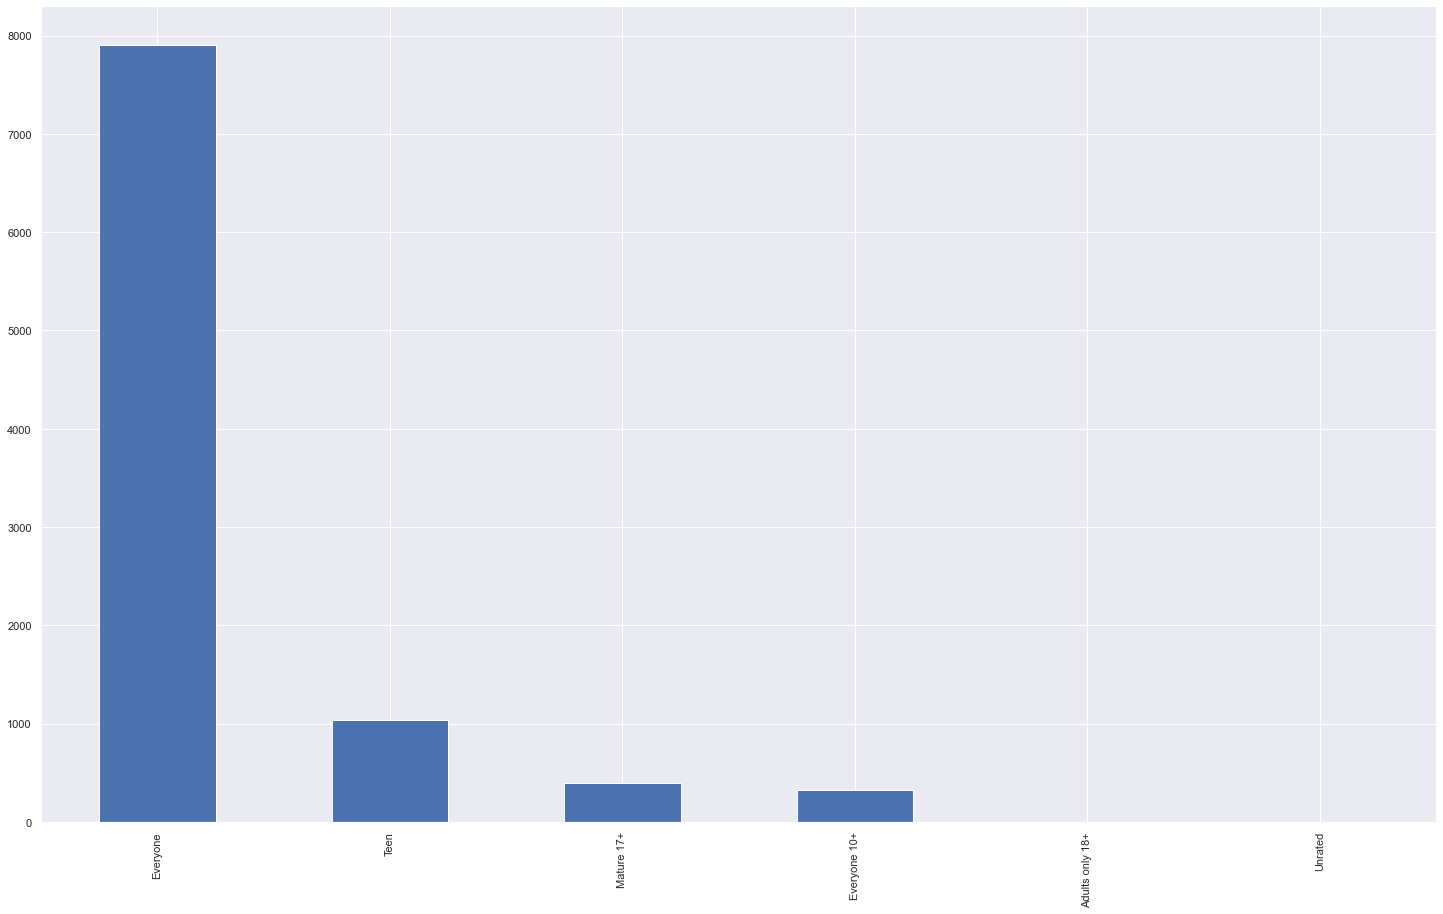

In [129]:
df["Content Rating"].value_counts().plot(kind='bar')
plt.yscale('linear')

CONTENT RATING FREQ DIST

    ==========================================================================
  

GENRES|

In [130]:
df.Genres.value_counts()

Tools                                  826
Entertainment                          561
Education                              510
Business                               420
Medical                                395
                                      ... 
Role Playing;Brain Games                 1
Books & Reference;Creativity             1
Health & Fitness;Action & Adventure      1
Adventure;Education                      1
Parenting;Brain Games                    1
Name: Genres, Length: 118, dtype: int64

In [131]:

sep = ';'
primary = df.Genres.apply(lambda x: x.split(sep)[0])
df['Pri_Genres']=primary
df.Pri_Genres

0             Art & Design
1             Art & Design
2             Art & Design
3             Art & Design
4             Art & Design
               ...        
10836            Education
10837            Education
10838              Medical
10839    Books & Reference
10840            Lifestyle
Name: Pri_Genres, Length: 9658, dtype: object

In [132]:
sec = df.Genres.apply(lambda x: x.split(sep)[-1])
sec.unique()
df['Sec_Genres']=sec
df.Sec_Genres

0             Art & Design
1             Pretend Play
2             Art & Design
3             Art & Design
4               Creativity
               ...        
10836            Education
10837            Education
10838              Medical
10839    Books & Reference
10840            Lifestyle
Name: Sec_Genres, Length: 9658, dtype: object

In [133]:
grouped = df.groupby(['Pri_Genres','Sec_Genres'])
grouped.size()

Pri_Genres               Sec_Genres             
Action                   Action                     299
                         Action & Adventure          12
Adventure                Action & Adventure           5
                         Adventure                   73
                         Brain Games                  1
                                                   ... 
Video Players & Editors  Creativity                   1
                         Music & Video                2
                         Video Players & Editors    162
Weather                  Weather                     79
Word                     Word                        23
Length: 117, dtype: int64

In [134]:
twowaytable = pd.crosstab(index=df["Pri_Genres"],columns=df["Sec_Genres"])
twowaytable.head()

Sec_Genres,Action,Action & Adventure,Adventure,Arcade,Art & Design,Auto & Vehicles,Beauty,Board,Books & Reference,Brain Games,...,Simulation,Social,Sports,Strategy,Tools,Travel & Local,Trivia,Video Players & Editors,Weather,Word
Pri_Genres,,,,,,,,,,,,,,,,,,,,,
Action,299,12,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,5,73,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Arcade,0,14,0,184,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Art & Design,0,1,0,0,57,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Auto & Vehicles,0,0,0,0,0,85,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


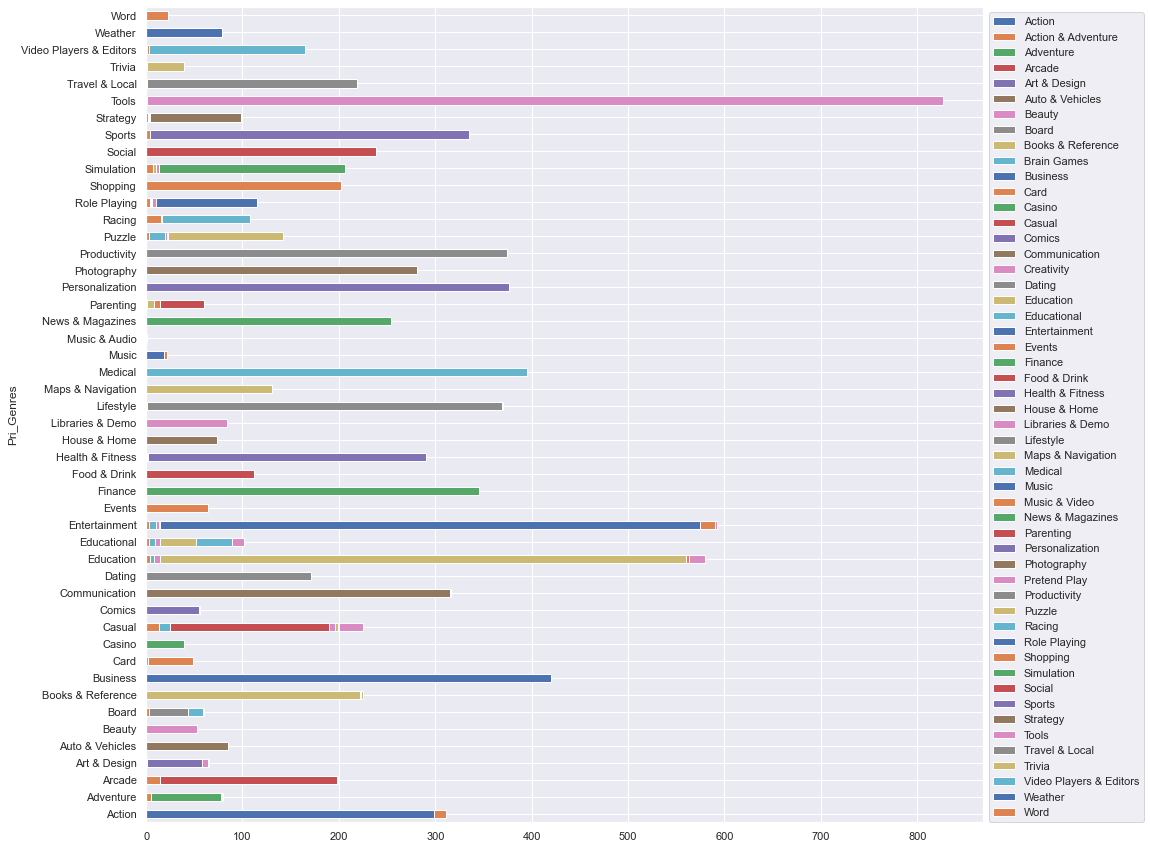

In [135]:
twowaytable.plot(kind="barh", figsize=(15,15),stacked=True);
plt.legend(bbox_to_anchor=(1.0,1.0))

In [136]:
df.head(50)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Pri_Genres,Sec_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,Art & Design,Creativity
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,Art & Design,Creativity


In [137]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Pri_Genres,Sec_Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,Art & Design,Creativity
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,Education,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,Education,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,Medical,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,Books & Reference,Books & Reference


## EDA ON THE DATASET

Pairplot of all numeric relations

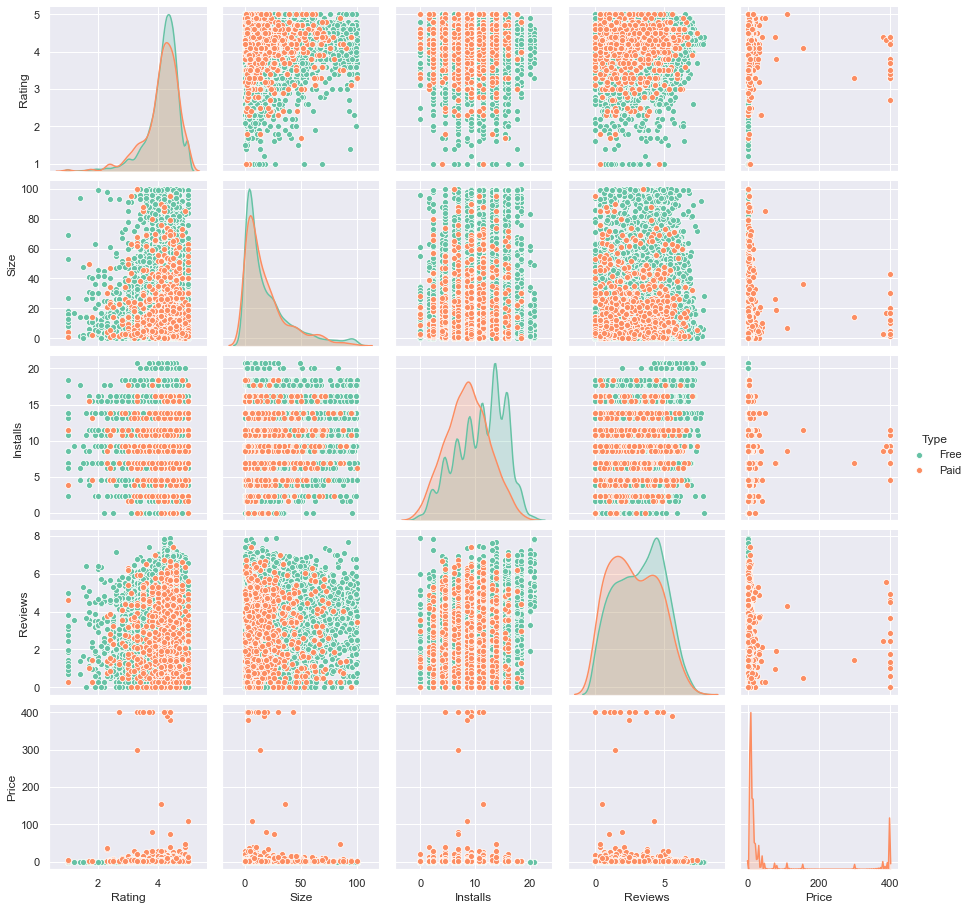

In [47]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

## Frequency dist and histograms of attributes

In [48]:
#distribution of apps by category
number_of_apps_in_category = df['Category'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps_in_category.index,
        values = number_of_apps_in_category.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='active_category')

In [49]:
#dis
df['Category'].value_counts().iplot(kind='bar', title='Frequency', xTitle='Category', yTitle = 'number of app')

In [50]:
#distribution of apps by content rating
number_of_apps = df['Content Rating'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = number_of_apps.index,
        values = number_of_apps.values,
        hoverinfo = 'label+value'
    
)]

plotly.offline.iplot(data, filename='content rating')

In [51]:
df['Content Rating'].value_counts().iplot(kind='bar', title='Frequency', xTitle='Rating', yTitle = 'number of app')

In [52]:
#distribution of ratings
data = [go.Histogram(
        x = df.Rating,
        xbins = {'start': 1, 'size': 0.1, 'end' :5}
)]

print('Average app rating = ', np.mean(df['Rating']))
plotly.offline.iplot(data, filename='overall_rating_distribution')

Average app rating =  4.173243045387998


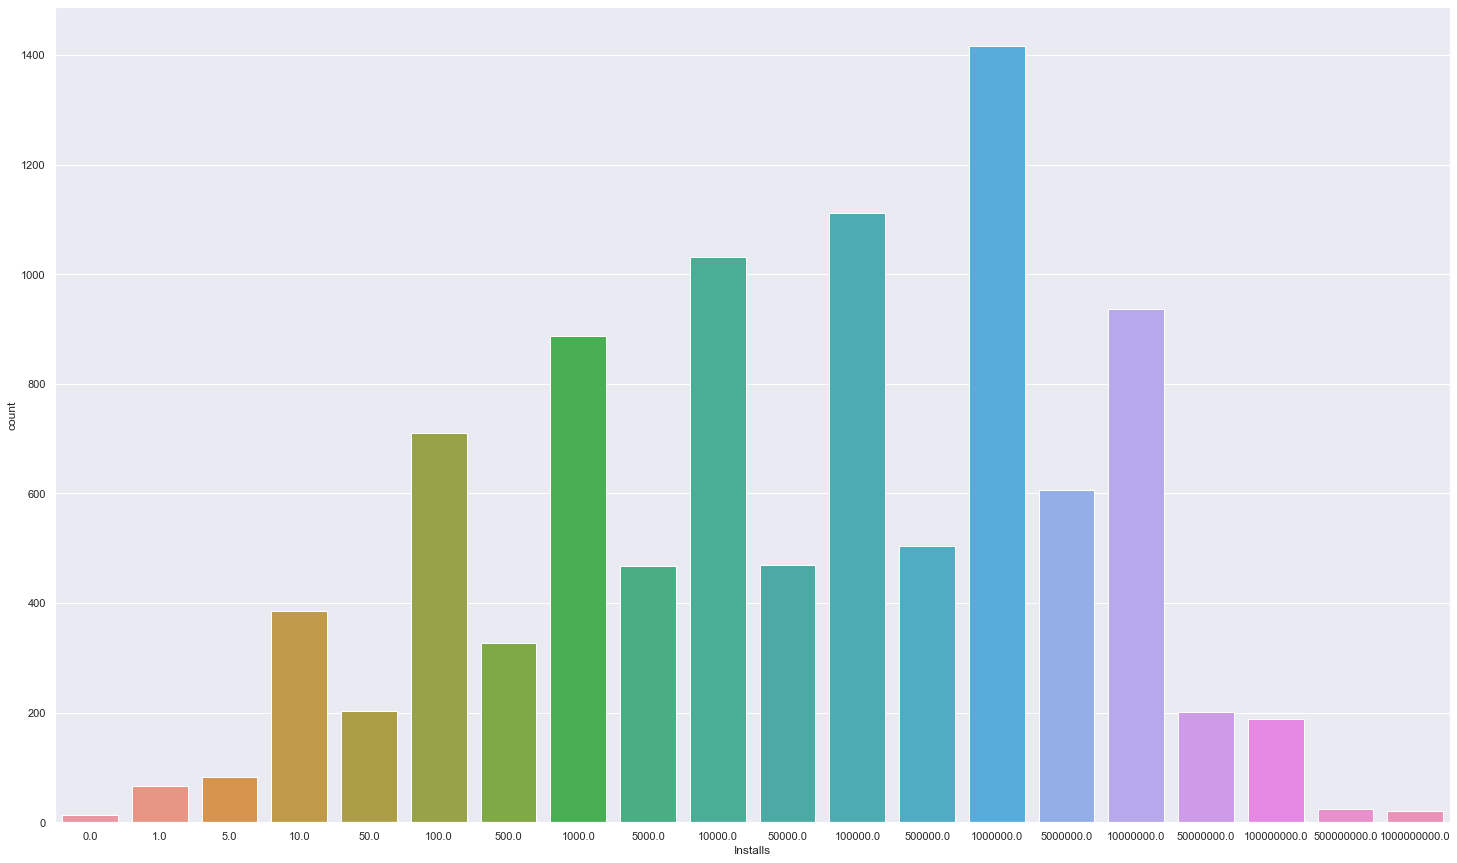

In [53]:
#Distribution of Installs
sns.countplot('Installs', data=df)

### Sizing Strategy

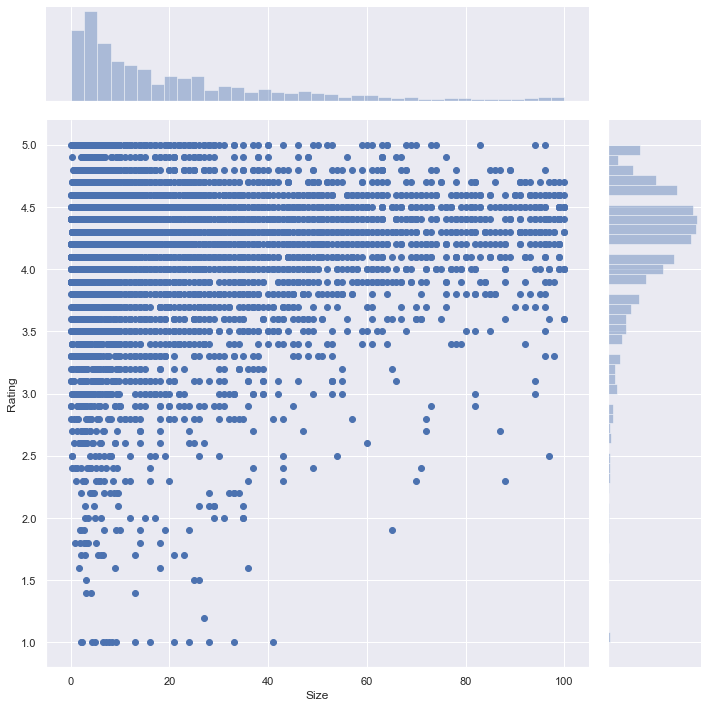

In [54]:
#Ratings by size
sns.set_style("darkgrid")
ax = sns.jointplot(df['Size'], df['Rating'], height = 10)
#ax.set_title('Rating Vs Size')

Most top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

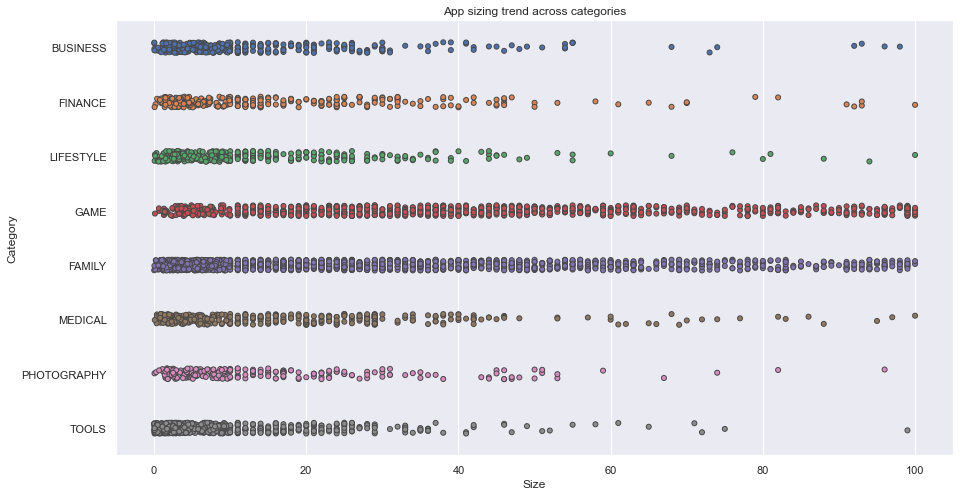

In [55]:
#Size distribution by category
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Size", y="Category", data=subset_df, linewidth=1)
title = ax.set_title('App sizing trend across categories')

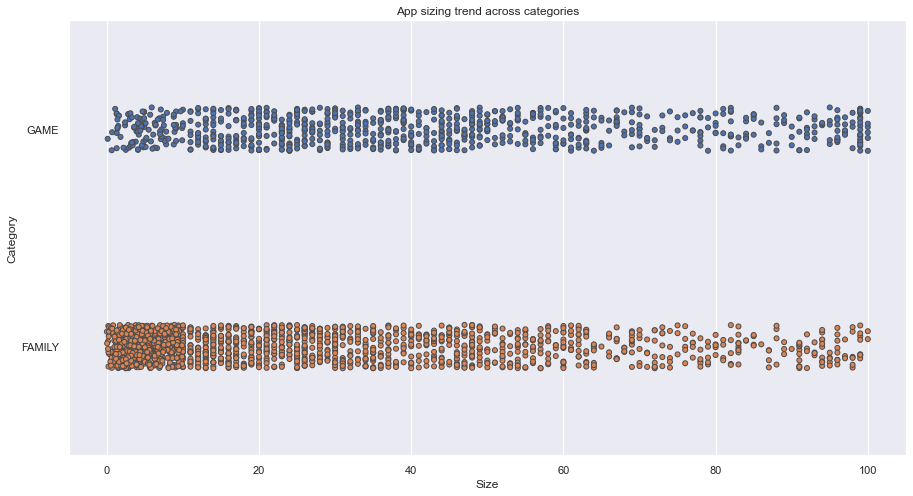

In [56]:
#Size distribution by category
subset_df = df[df.Category.isin(['GAME', 'FAMILY'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Size", y="Category", data=subset_df, linewidth=1)
title = ax.set_title('App sizing trend across categories')

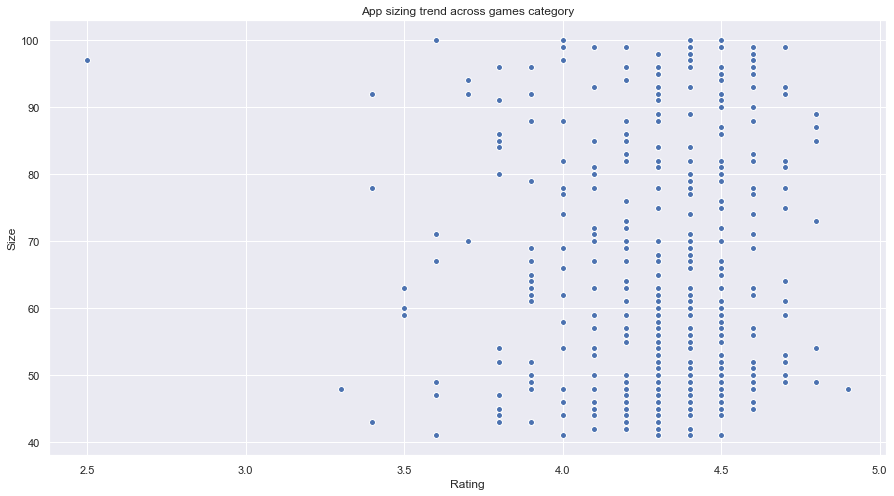

In [57]:
#Sizing of games 
subset_df = df[df.Size>40]
subset_df = subset_df[df.Category.isin(['GAME'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.scatterplot(x="Rating", y="Size",data=subset_df, linewidth=1)
p.set()
title = ax.set_title('App sizing trend across games category')

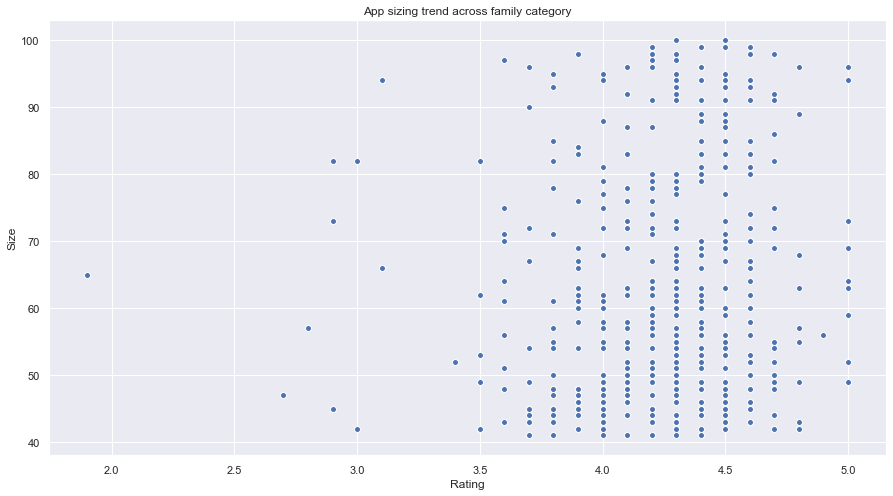

In [58]:
#Sizing of family apps 
subset_df = df[df.Size>40]
subset_df = subset_df[df.Category.isin(['FAMILY'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.scatterplot(x="Rating", y="Size",data=subset_df, linewidth=1)
p.set()
title = ax.set_title('App sizing trend across family category')

In [59]:
subset_df = df[df.Size>40]
subset_df = subset_df[df.Category.isin(['GAME','FAMILY'])]

data = [{
    'x': subset_df.loc[subset_df.Category==category[1]]['Rating'], 
    'type':'scatter',
    'y' : subset_df['Size'],
    'name' : str(category[1]),
    'mode' : 'markers',
    'showlegend': True,
    } for category in enumerate(['GAME', 'FAMILY'])]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'black'}

plotly.offline.iplot({'data': data, 'layout': layout})



Most bulky apps ( >50MB) belong to the Game and Family category. Despite this, these bulky apps are fairly highly rated indicating that they are bulky for a purpose.

## Pricing Strategy

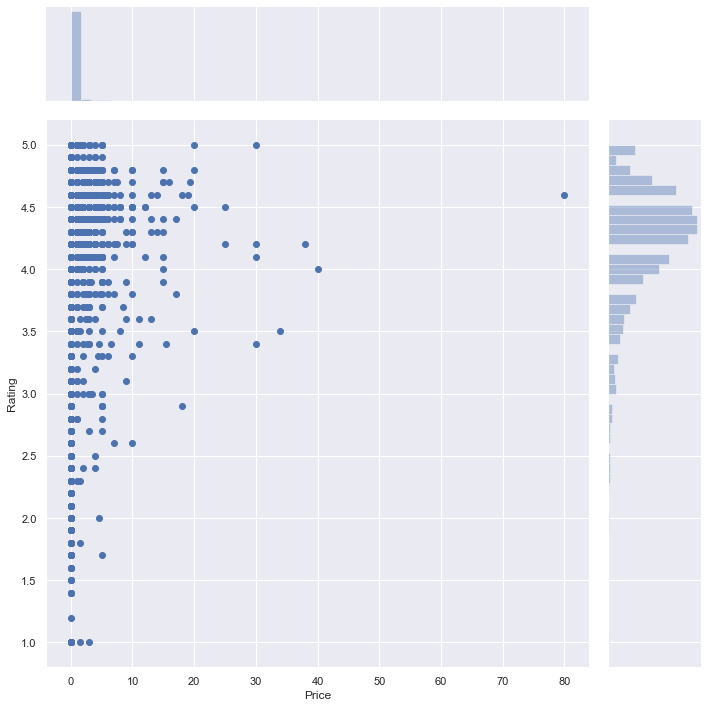

In [60]:
paid_apps = df[df.Price<100]
p = sns.jointplot( "Price", "Rating", paid_apps, height=10)

Most top rated apps are optimally priced between ~1$ to ~30$. There are only a very few apps priced above 20$.

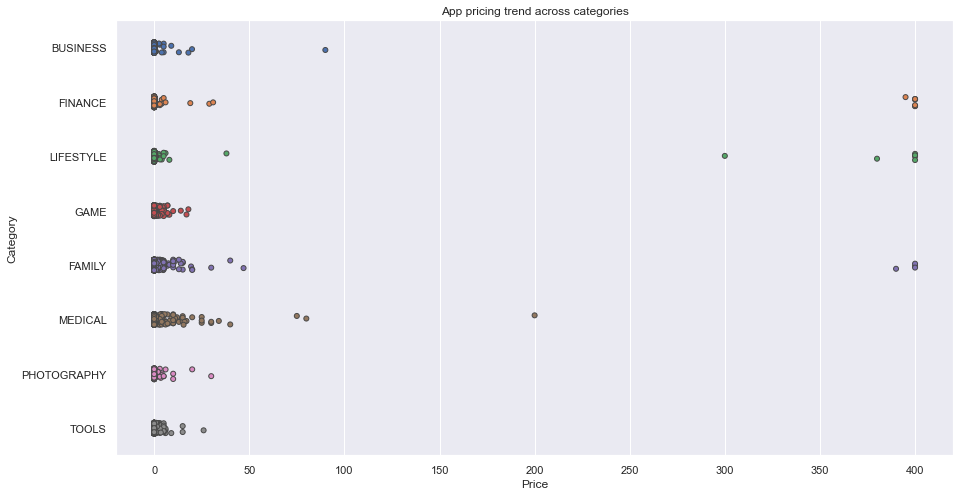

In [61]:
#Pricing across category
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

Some junk apps over $200

In [62]:
#print('Junk apps priced above 200$')
df[['Category', 'App']][df.Price > 200]

,Category,App
4197,FAMILY,most expensive app (H)
4362,LIFESTYLE,💎 I'm rich
4367,LIFESTYLE,I'm Rich - Trump Edition
5351,LIFESTYLE,I am rich
5354,FAMILY,I am Rich Plus
5355,LIFESTYLE,I am rich VIP
5356,FINANCE,I Am Rich Premium
5357,LIFESTYLE,I am extremely Rich
5358,FINANCE,I am Rich!
5359,FINANCE,I am rich(premium)


These apps are non functional status quo type of apps

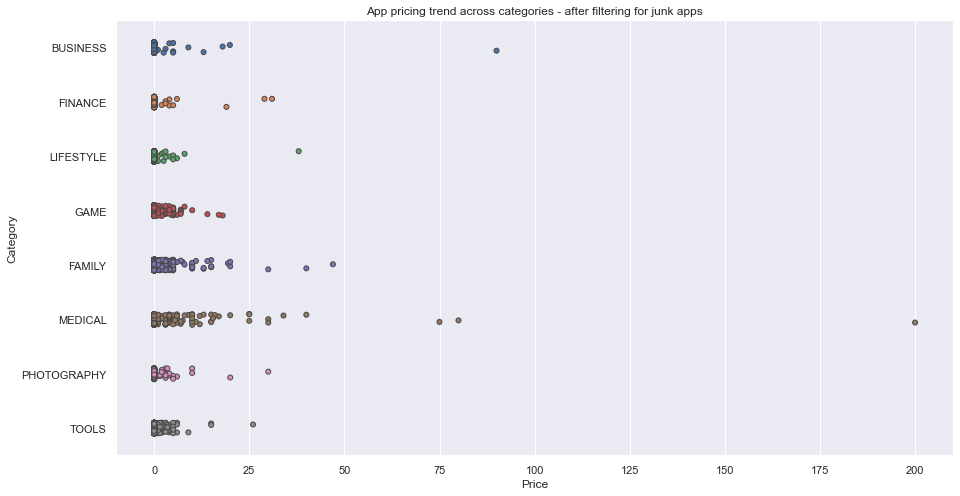

In [63]:
#Pricing after filtering the junk apps
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
subset_df_price = subset_df[subset_df.Price<250]
p = sns.stripplot(x="Price", y="Category", data=subset_df_price, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories - after filtering for junk apps')

Medical apps are the most expensive across the playstore

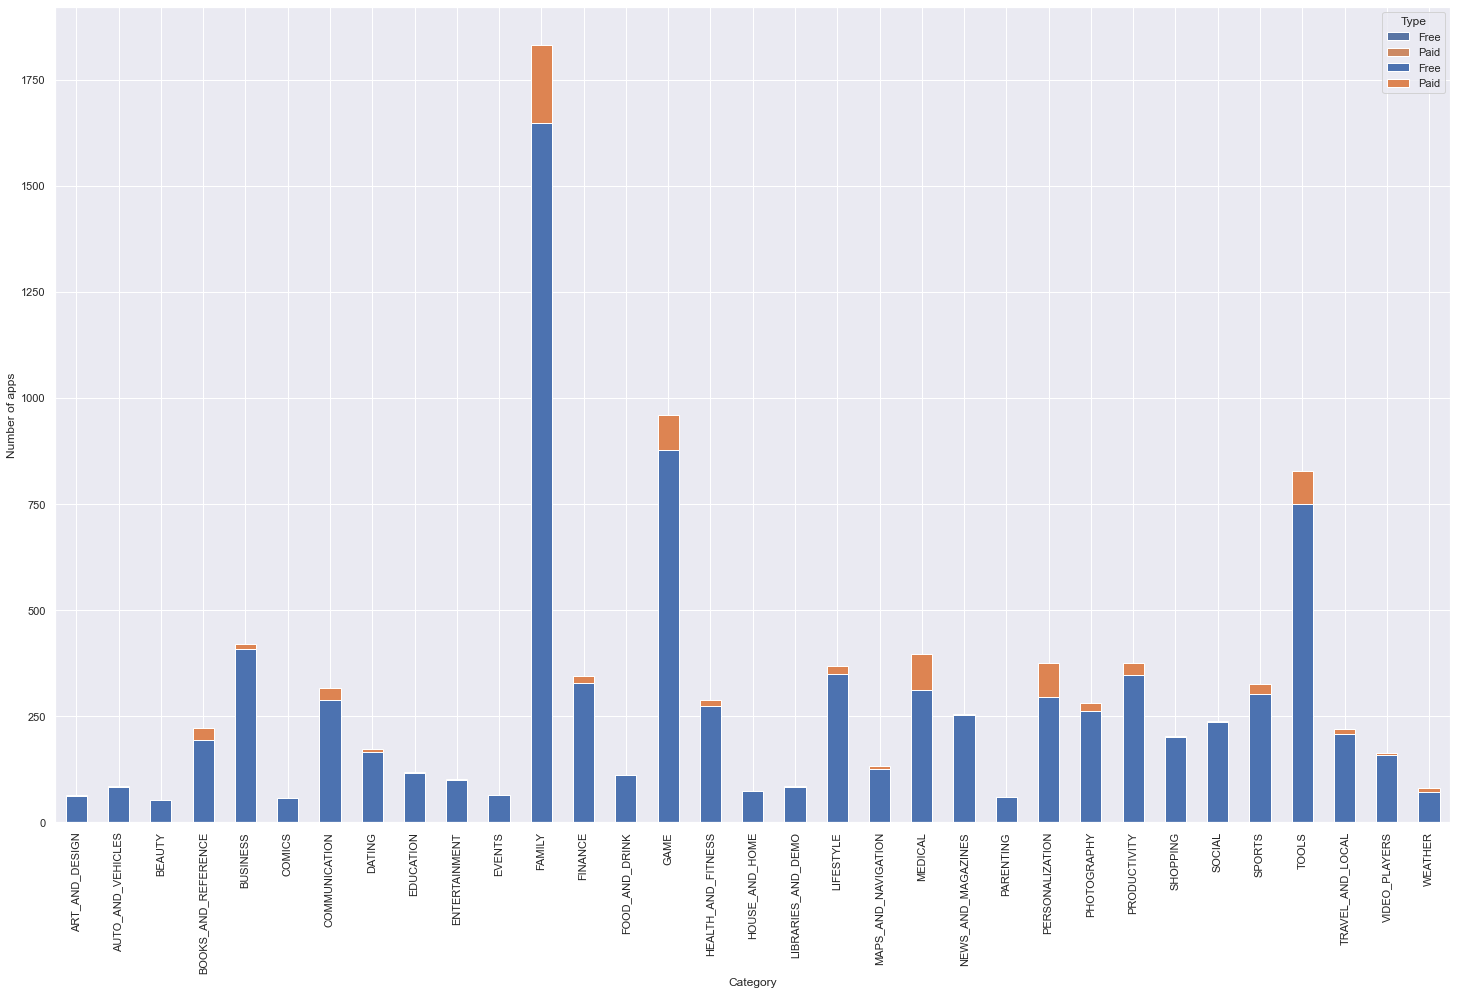

In [64]:

new_df = df.groupby(['Category', 'Type']).agg({'App' : 'count'}).reset_index()
ax = sns.countplot(x="Category", hue="Type", data=new_df)

df.groupby(['Category', 'Type']).count()['App'].unstack().plot(kind='bar', stacked=True, ax=ax)
ylabel = plt.ylabel('Number of apps')

## Paid Apps downloads

In [65]:
#Number of installs for free vs paid apps
trace0 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=np.log10(df['Installs'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Number of downloads of paid apps Vs free apps",
    yaxis= {'title': 'Number of downloads (log-scaled)'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## Paid apps vs free apps downloads

In [66]:
#Number of installs for free vs paid apps
trace0 = go.Box(
    y=(df['Rating'][df.Type=='Paid']),
    name = 'Paid',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )

)
trace1 = go.Box(
    y=(df['Rating'][df.Type=='Free']),
    name = 'Free',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)
layout = go.Layout(
    title = "Ratings of paid apps Vs free apps",
    yaxis= {'title': 'Ratings'}
)
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## Paid Apps Sizing

In [67]:
#Ratings vs Size of Paid Apps
temp_df = df[df.Type == 'Paid']
temp_df = temp_df[temp_df.Size > 5]
#type_groups = df.groupby('Type')

data = [{
    #'x': type_groups.get_group(t)['Rating'], 
    'x' : temp_df['Rating'],
    'type':'scatter',
    'y' : temp_df['Size'],
    #'name' : t,
    'mode' : 'markers',
    #'showlegend': True,
    'text' : df['Size'],
    } for t in set(temp_df.Type)]


layout = {'title':"Rating vs Size", 
          'xaxis': {'title' : 'Rating'},
          'yaxis' : {'title' : 'Size (in MB)'},
         'plot_bgcolor': 'rgb(0,0,0)'}

plotly.offline.iplot({'data': data, 'layout': layout})

## Exploring Correlations

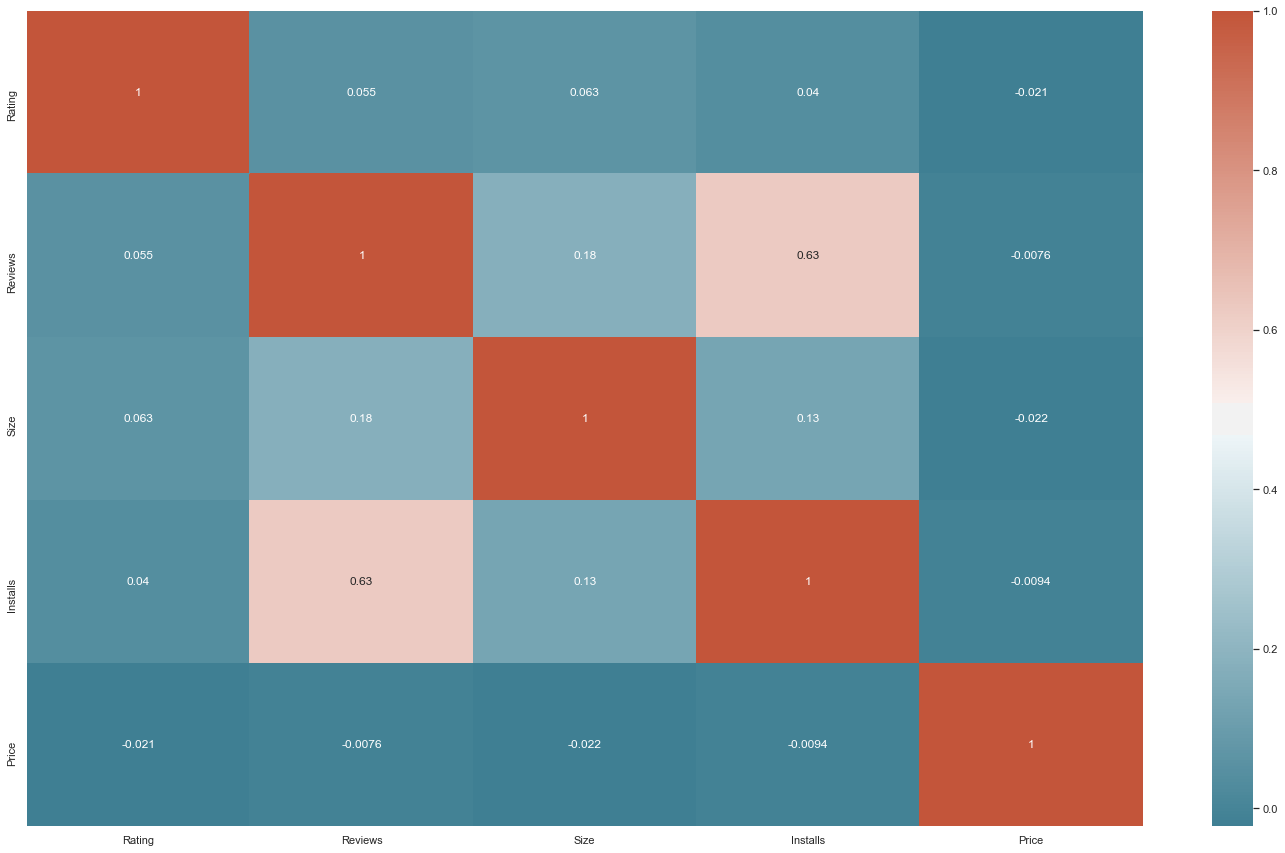

In [68]:
#Correlation Matrix of all numeric attributes
corrmat = df.corr()
p =sns.heatmap(corrmat, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

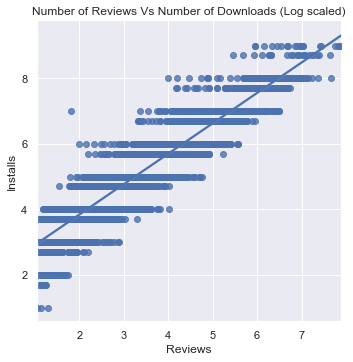

In [69]:
df_copy = df.copy()

df_copy = df_copy[df_copy.Reviews > 10]
df_copy = df_copy[df_copy.Installs > 0]

df_copy['Installs'] = np.log10(df['Installs'])
df_copy['Reviews'] = np.log10(df['Reviews'])

sns.lmplot("Reviews", "Installs", data=df_copy)
ax = plt.gca()
_ = ax.set_title('Number of Reviews Vs Number of Downloads (Log scaled)')

A moderate positive correlation of 0.63 exists between the number of reviews and number of downloads. This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

This also means that many active users who download an app usually also leave back a review or feedback.

So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!



## Effect of Reviews

Text(0.5, 1.0, 'Rating VS Reveiws')

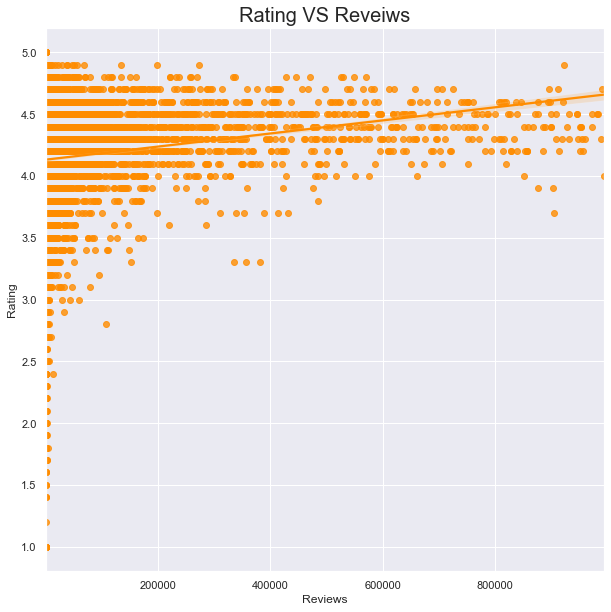

In [70]:
plt.figure(figsize = (10,10))
sns.regplot(x="Reviews", y="Rating", color = 'darkorange',data=df[df['Reviews']<1000000]);
plt.title('Rating VS Reveiws',size = 20)

## Sentiment Analysis

In [71]:
reviews=pd.read_csv("googleplaystore_user_reviews.csv")

In [72]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [73]:
data=pd.concat([reviews.Translated_Review,reviews.Sentiment],axis=1)
data.dropna(axis=0,inplace=True)
data.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


In [74]:
data.Sentiment.value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [75]:
data.Sentiment=[0 if i=="Positive" else 1 if i== "Negative" else 2 for i in data.Sentiment]
data.head(10)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,0
1,This help eating healthy exercise regular basis,0
3,Works great especially going grocery store,0
4,Best idea us,0
5,Best way,0
6,Amazing,0
8,"Looking forward app,",2
9,It helpful site ! It help foods get !,2
10,good you.,0
11,Useful information The amount spelling errors ...,0


Here we will remove characters which are not letters. ":) # $ @ ()!-/*" like that!

Also converting them lower case.

In [76]:
#Data cleaning
import re
first_text=data.Translated_Review[0]
text=re.sub("[^a-zA-Z]"," ",first_text) #changing characters with space
text=text.lower()

In [77]:
text

'i like eat delicious food  that s i m cooking food myself  case     best foods  helps lot  also  best before  shelf life  '

In [78]:
import nltk
#nltk.download("stopwords")
#nltk.download("punkt")
from nltk.corpus import stopwords
text=nltk.word_tokenize(text) #separate all words

In [79]:
text

['i',
 'like',
 'eat',
 'delicious',
 'food',
 'that',
 's',
 'i',
 'm',
 'cooking',
 'food',
 'myself',
 'case',
 'best',
 'foods',
 'helps',
 'lot',
 'also',
 'best',
 'before',
 'shelf',
 'life']

In [80]:
#lemmatization books----> book
import nltk as nlp
#nltk.download('wordnet')
lemma=nlp.WordNetLemmatizer()
text=[lemma.lemmatize(i) for i in text]
text=" ".join(text)
text

'i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life'

Lemmetization transforms words into their root form

In [81]:
text_list=[]
for i in data.Translated_Review:
    text=re.sub("[^a-zA-Z]"," ",i)
    text=text.lower()
    text=nltk.word_tokenize(text)
    lemma=nlp.WordNetLemmatizer()
    text=[lemma.lemmatize(word) for word in text]
    text=" ".join(text)
    text_list.append(text)

In [82]:
text_list[:2]

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis']

In [83]:
reviews.App.dtype

dtype('O')

In [84]:
merged_df = df.join(data,  how = "inner")
merged_df = merged_df.dropna(subset=['Sentiment', 'Translated_Review'])

In [85]:
merged_df['Sentiment_Polarity'] = reviews['Sentiment_Polarity']

In [86]:
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Pri_Genres,Sec_Genres,Translated_Review,Sentiment,Sentiment_Polarity
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design,I like eat delicious food. That's I'm cooking ...,0,1.00
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,Art & Design,Pretend Play,This help eating healthy exercise regular basis,0,0.25
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,Art & Design,Art & Design,Works great especially going grocery store,0,0.40
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,Art & Design,Creativity,Best idea us,0,1.00
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000.0,Free,0.0,Everyone,Art & Design,Art & Design,Art & Design,Best way,0,1.00


In [87]:
from wordcloud import WordCloud

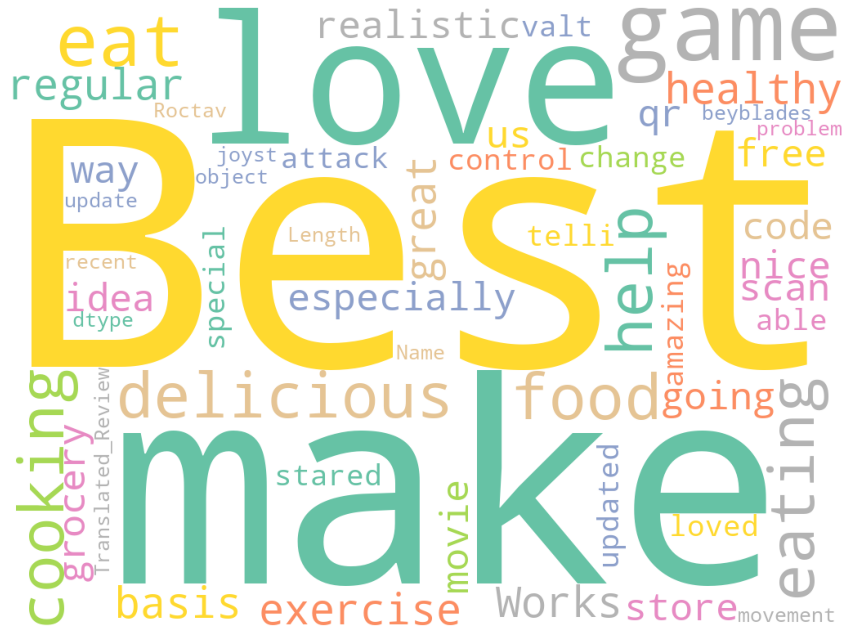

In [88]:
free = merged_df.loc[merged_df.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wordcloud=WordCloud(background_color="white",width=1024,height=768,max_words=200, colormap="Set2").generate(''.join(str(free)))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Positive words: Best, Love, Nice

Negative words: Problem, AD, 

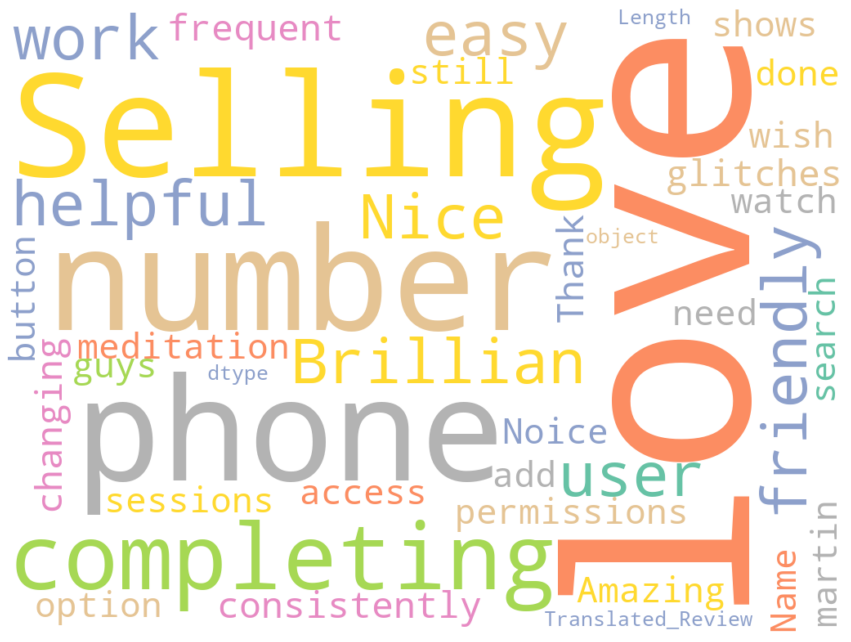

In [89]:
paid = merged_df.loc[merged_df.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wordcloud=WordCloud(background_color="white",width=1024,height=768, colormap="Set2").generate(''.join(str(paid)))
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Positive Words: helpful, nice, amazing

Negative Words: glitches, ad

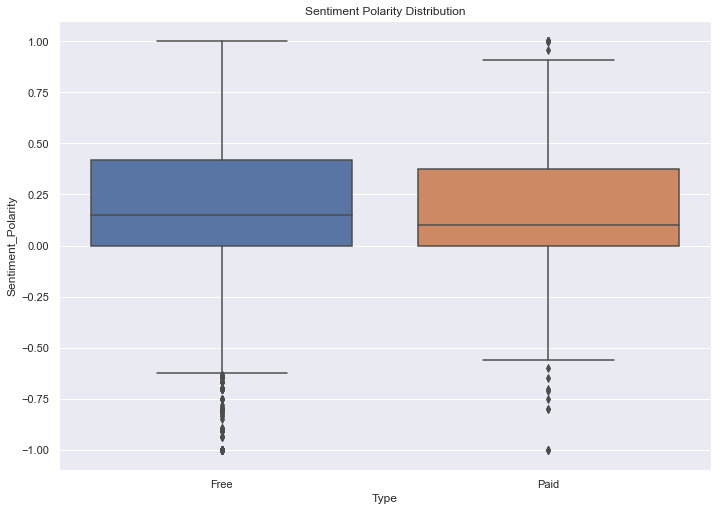

In [90]:
sns.set_style('ticks')
sns.set_style("darkgrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.boxplot(x='Type', y='Sentiment_Polarity', data=merged_df)
title = ax.set_title('Sentiment Polarity Distribution')

Free apps receive a lot of harsh comments which are indicated as outliers on the negative Y-axis.

Users are more lenient and tolerant while reviewing paid apps - moderate choice of words. They are never extremely negative while reviewing a paid app.

# INSIGHTS WE DERIVED

####  1. Average rating of (active) apps on Google Play Store is 4.17.

#### 2. Users prefer to pay for apps that are light-weighted. Thus, a paid app that is bulky may not perform well in the market.

#### 3. Most of the top rated apps are optimally sized between ~2MB to ~40MB - neither too light nor too heavy.

#### 4. Most of the top rated apps are optimally priced between ~1$ to ~30$ - neither too cheap nor too expensive.

#### 5.Medical and Family apps are the most expensive and even extend upto 80$.

#### 6. Users tend to download a given app more if it has been reviewed by a large number of people.

#### 7. Health and Fitness apps receive more than 85% positive reviews. Game and Social apps receive mixed feedback - 50% positive and 50% negative.

#### 8. Users are more grim and harsh while reviewing free apps than paid apps.